In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
train_path = "../Computer Vision Masterclass/Datasets/cat_dog_2/training_set"
test_path = "../Computer Vision Masterclass/Datasets/cat_dog_2/test_set"

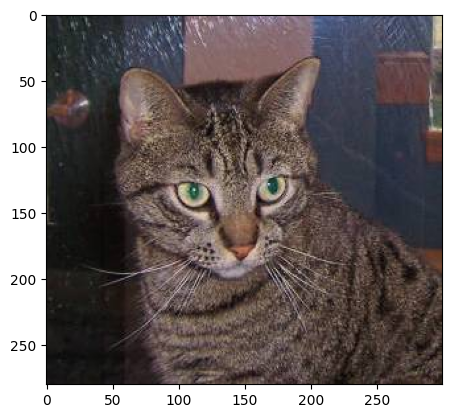

In [3]:
img = cv2.imread(train_path + "/cat/cat.1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)

In [4]:
# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing, etc.
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]



#making image as 227X227 for input of alexnet
# train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')
train = train_datagen.flow_from_directory(train_path, target_size=(64, 64), shuffle=True, class_mode='categorical')


Found 4000 images belonging to 2 classes.


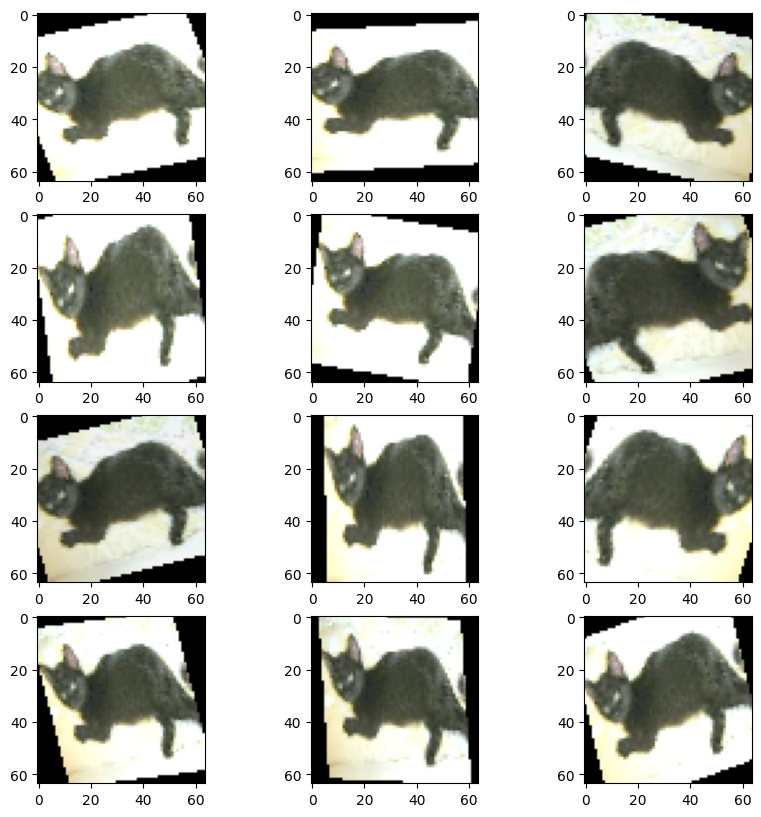

In [5]:
fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test = test_datagen.flow_from_directory(test_path, target_size=(64,64), shuffle=False, class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [29]:
network = Sequential()


network.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

network.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

network.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

#  # units are the numbers of values after flattening the previous layer. (Neurons + 2) / 2 
# network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=512, activation='relu')) # worked
network.add(Dense(units=64, activation='relu')) # worked
network.add(Dropout(rate=0.2))
network.add(Dense(units=2, activation='softmax')) # returns probability for each class. Sigmoid would return probability for 1 class

network.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 25, 25, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 10, 10, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,821,698 (6.95 MB)

 Trainable params: 1,821,698 (6.95 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Define the learning rate you want to use
learning_rate = 0.0003  # Example learning rate

# Instantiate the Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile your neural network model with the customized optimizer
network.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = network.fit(train, epochs=20)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.7753 - loss: 0.4871
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.7569 - loss: 0.5019
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.7999 - loss: 0.4324
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.8009 - loss: 0.4309
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.8106 - loss: 0.4155
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.8194 - loss: 0.3935
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.8211 - loss: 0.4070
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.8161 - loss: 0.4094
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.8301 - loss: 0.3758
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.8354 - loss: 0.3729
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.8446 - loss: 0.3484
Epoch 12/20
125/125

In [38]:
predictions = network.predict(test)
predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


array([[1.1983974e-01, 8.8016021e-01],
       [1.2633809e-02, 9.8736620e-01],
       [3.5327312e-01, 6.4672691e-01],
       ...,
       [2.0882646e-02, 9.7911727e-01],
       [4.4008322e-02, 9.5599169e-01],
       [2.8565049e-04, 9.9971431e-01]], dtype=float32)

In [39]:
# predicted values
predictions = np.argmax(predictions, axis=1)
predictions 

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

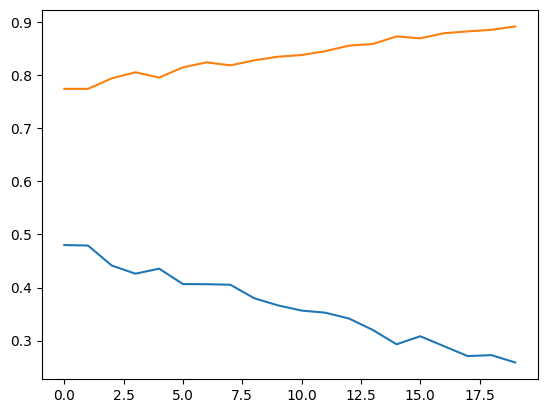

In [40]:
plt.plot(history.history['loss'] )
plt.plot(history.history['accuracy'] )

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(test.classes, predictions)

0.838